Завдання:
1. Оберіть ваш варіант та завантажте необхідний файл з даними.
2. Проаналізуйте приклади використання нейронної мережі для 
бінарної класифікації з використанням PyTorch та Numpy (код обох 
варіантів наведено у додатках нижче). Які активаційні функції та 
функції втрат там використано. Яка архітектура запропонованої 
мережі? Який варіант імплементації кращий та чому? Аргументуйте 
вашу відповідь у висновку до лабораторної роботи.
3. Проведіть експерименти з різною кількістю прихованих шарів у 
нейронній мережі для прогнозування цільової змінної вашого 
варіанту. Використайте різні кроки навчання, кількість епох та 
кількість нейронів у прихованих шарах. Порівняйте навчання та 
результати моделей використовуючи метрики класифікації. У 
висновку опишіть результати експериментів.
4. Дайте відповіді на контрольні запитання (усно).
5. Оформіть звіт.


In [1]:
import pandas as pd
import numpy as np

In [2]:
ds = pd.read_csv('../data/variant7-citrus.csv')

In [3]:
ds.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [5]:
ds['name'].value_counts()

name
orange        5000
grapefruit    5000
Name: count, dtype: int64

In [6]:
name_map = {
  'orange': 0,
  'grapefruit': 1,
}

In [7]:
ds['name'] = ds['name'].map(name_map).astype(float)

In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  float64
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 468.9 KB


In [9]:
ds.describe()

,name,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.500000,9.975685,175.050792,153.847800,76.010600,11.363200
std,0.500025,1.947844,29.212119,10.432954,11.708433,9.061275
min,0.000000,2.960000,86.760000,115.000000,31.000000,2.000000
25%,0.000000,8.460000,152.220000,147.000000,68.000000,2.000000
50%,0.500000,9.980000,174.985000,154.000000,76.000000,10.000000
75%,1.000000,11.480000,197.722500,161.000000,84.000000,17.000000
max,1.000000,16.450000,261.510000,192.000000,116.000000,56.000000


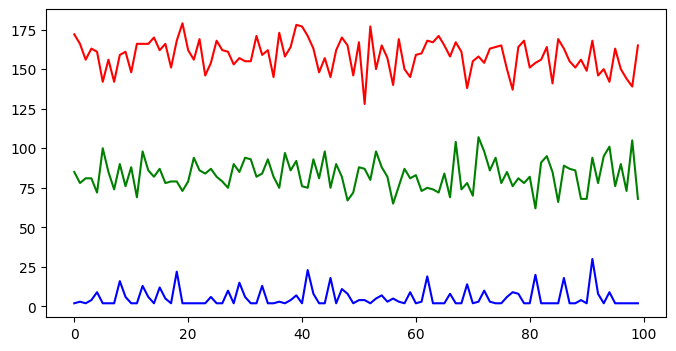

In [10]:
import matplotlib.pyplot as plt

n = 100
plt.figure(figsize=(8, 4))
plt.plot(range(n), ds['red'][:n], c='r')
plt.plot(range(n), ds['green'][:n], c='g')
plt.plot(range(n), ds['blue'][:n], c='b')
plt.show()

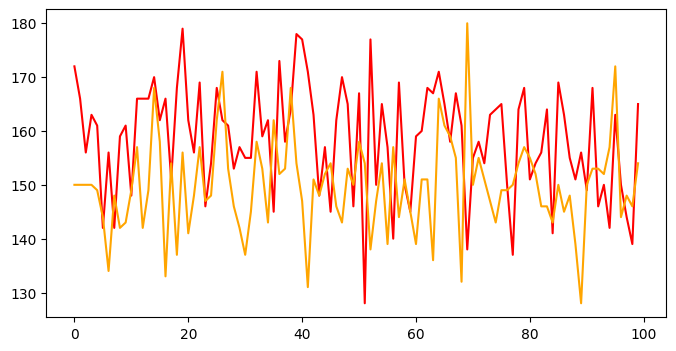

In [12]:
n = 100
plt.figure(figsize=(8, 4))
plt.plot(range(n), ds[ds['name'] == 0]['red'][:n], c='r')
plt.plot(range(n), ds[ds['name'] == 1]['red'][:n], c='orange')
plt.show()

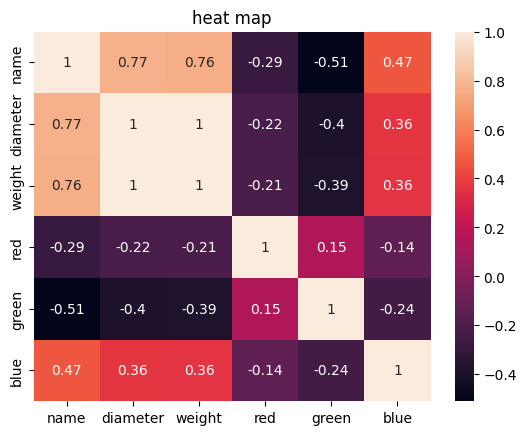

In [11]:
import seaborn as sns

corr_map = ds.corr()
sns.heatmap(corr_map, annot=True)
plt.title('heat map')
plt.show()

In [19]:
from sklearn.decomposition import PCA

n_components = 2
pca = PCA(n_components=n_components, random_state=42)
X_pca = pca.fit_transform(X_train_scaled)
print("Відсоток поясненої варіації:", pca.explained_variance_ratio_)

X_pca.shape

Відсоток поясненої варіації: [0.50900553 0.1836579 ]


(8000, 2)

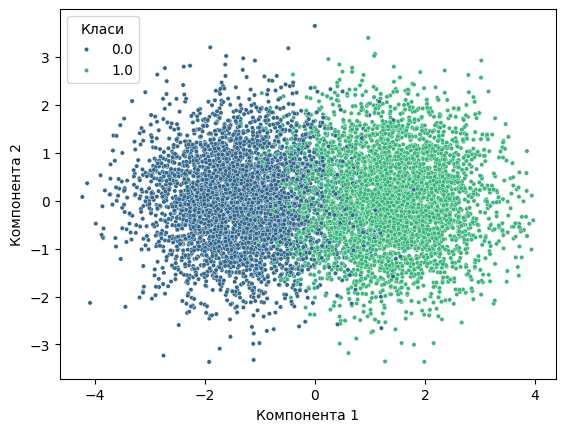

In [20]:
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_train, palette="viridis", s=10)
plt.xlabel("Компонента 1")
plt.ylabel("Компонента 2")
plt.legend(title="Класи")
plt.show()

# simple predictive model

In [13]:
X = ds.drop('name', axis=1)
y = ds['name']

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [16]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 9254 to 7270
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   diameter  8000 non-null   float64
 1   weight    8000 non-null   float64
 2   red       8000 non-null   float64
 3   green     8000 non-null   float64
 4   blue      8000 non-null   float64
dtypes: float64(5)
memory usage: 375.0 KB


In [17]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [18]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

models = [
  SVC(), 
  GaussianNB(),
  LogisticRegression(),
  RandomForestClassifier()
]
scores = [
  accuracy_score, recall_score, precision_score, f1_score
]

models_map = {}
for model in models:
  model_name = type(model).__name__
  
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_test_scaled)
  
  models_map[model_name] = [score(y_test, y_pred) for score in scores]
models_df = pd.DataFrame(models_map).T.rename(lambda s_index: scores[s_index].__name__, axis=1)
models_df
  

,accuracy_score,recall_score,precision_score,f1_score
SVC,0.9370,0.949393,0.925049,0.937063
GaussianNB,0.9200,0.930162,0.909901,0.919920
LogisticRegression,0.9415,0.949393,0.933333,0.941295
RandomForestClassifier,0.9550,0.964575,0.945437,0.954910


# introducing nn

In [21]:
import torch
from torch import nn

In [22]:
in_features_len = X_train.shape[1]
X_train.shape, y_train.shape

((8000, 5), (8000,))

In [23]:
X_train.head(3)

,diameter,weight,red,green,blue
9254,12.77,217.28,153,75,23
1561,7.87,143.57,159,86,19
1670,7.95,144.74,173,82,2


In [ ]:
# to install torch with cude support ?
# pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

In [24]:
print(torch.cuda.is_available())  # Should return True
print(torch.cuda.device_count())  # Should return the number of GPUs

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device = "cpu"

True
1


In [25]:
X_train_torch = torch.from_numpy(X_train_scaled.to_numpy()).type(torch.float32).to(device)
X_test_torch = torch.from_numpy(X_test_scaled.to_numpy()).type(torch.float32).to(device)

y_train_torch = torch.from_numpy(y_train.to_numpy()).type(torch.float32).to(device)
y_test_torch = torch.from_numpy(y_test.to_numpy()).type(torch.float32).to(device)

In [26]:
class CitrusModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=in_features_len,out_features=12,)
    self.layer_2 = nn.Linear(in_features=12,out_features=10,)
    self.layer_3 = nn.Linear(in_features=10,out_features=1,)
    self.relu = nn.ReLU()
    
  def forward(self, x):
    x = self.layer_1(x)
    x = self.relu(x)
    x = self.layer_2(x)
    x = self.relu(x)
    x = self.layer_3(x)
    return x

# 4. Create an instance of the model and send it to target device
model_0 = CitrusModel().to(device)
model_0

CitrusModel(
  (layer_1): Linear(in_features=5, out_features=12, bias=True)
  (layer_2): Linear(in_features=12, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [27]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(
  params=model_0.parameters(),
  lr=0.1,
)

In [28]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [29]:
y_logits = model_0(X_test_torch)[:5]
y_logits

tensor([[0.1185],
        [0.3586],
        [0.1719],
        [0.1772],
        [0.1402]], grad_fn=<SliceBackward0>)

However, these numbers are hard to interpret.

We'd like some numbers that are comparable to our truth labels.

To get our model's raw outputs (logits) into such a form, we can use the sigmoid activation function.

In [30]:
# Use sigmoid on model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5296],
        [0.5887],
        [0.5429],
        [0.5442],
        [0.5350]], grad_fn=<SigmoidBackward0>)

In [31]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# Get rid of extra dimension
y_preds.squeeze()

tensor([1., 1., 1., 1., 1.], grad_fn=<SqueezeBackward0>)

In [48]:
# Make predictions with the model
untrained_preds = model_0(X_test_torch)
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 2000, Shape: torch.Size([2000, 1])
Length of test samples: 2000, Shape: (2000,)

First 10 predictions:
tensor([[ 0.0284],
        [ 0.3267],
        [-0.3924],
        [-0.1276],
        [-0.2496],
        [ 0.0207],
        [-0.3428],
        [ 0.2828],
        [-0.3231],
        [-0.2280]], device='cuda:0', grad_fn=<SliceBackward0>)

First 10 test labels:
6252    1.0
4684    0.0
1731    0.0
4742    0.0
4521    0.0
6340    1.0
576     0.0
5202    1.0
6363    1.0
439     0.0
Name: name, dtype: float64


In [33]:
torch.manual_seed(42)
epochs = 500

for epoch in range(epochs):
  ### training
  model_0.train()
  
  # forward pass
  y_logits = model_0(X_train_torch).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  
  # calculate loss
  loss = loss_fn(y_logits, y_train_torch)
  acc = accuracy_fn(y_train_torch, y_pred)
  
  # optimizer zero grad
  optimizer.zero_grad()
  
  # loss backwards
  loss.backward()
  
  # optimizer step
  optimizer.step()
  
  ### testing
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test_torch).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # calc loss & acc
    test_loss = loss_fn(test_logits, y_test_torch)
    test_acc = accuracy_fn(y_test_torch, test_pred)
    
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")
  

Epoch: 0 | Loss: 0.17837, Accuracy: 92.67% | Test loss: 0.17571, Test acc: 93.10%
Epoch: 100 | Loss: 0.17800, Accuracy: 92.71% | Test loss: 0.17549, Test acc: 93.10%
Epoch: 200 | Loss: 0.17764, Accuracy: 92.74% | Test loss: 0.17532, Test acc: 93.15%
Epoch: 300 | Loss: 0.17730, Accuracy: 92.75% | Test loss: 0.17512, Test acc: 93.25%
Epoch: 400 | Loss: 0.17698, Accuracy: 92.75% | Test loss: 0.17495, Test acc: 93.25%


In [34]:
model_0.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_0(X_test_torch))).squeeze()
y_preds[:10], y_test_torch[:10] # want preds in same format as truth labels

(tensor([1., 0., 0., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 0., 0., 0., 1., 0., 1., 1., 0.]))

In [40]:
y_preds.numpy().astype(int)

array([1, 0, 0, ..., 1, 0, 1])

In [43]:
y_test.to_numpy().astype(int)

array([1, 0, 0, ..., 1, 0, 1])

In [46]:
name_map

{'orange': 0, 'grapefruit': 1}

In [45]:
print(classification_report(
  y_test.to_numpy().astype(int),
  y_preds.numpy().astype(int),
))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1012
           1       0.93      0.94      0.93       988

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



In [47]:
# звичайні нелінійні модельки
models_df

,accuracy_score,recall_score,precision_score,f1_score
SVC,0.9370,0.949393,0.925049,0.937063
GaussianNB,0.9200,0.930162,0.909901,0.919920
LogisticRegression,0.9415,0.949393,0.933333,0.941295
RandomForestClassifier,0.9550,0.964575,0.945437,0.954910


моделька справилась файно, але і датасетик не поганий, тут навіть логістична регресія дала трохи кращий f1 ніж оця нейронка

зробим ще одну, може вона краща.
візьмем ту шо в методичці

In [108]:
class CitrusModelTeachers(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super().__init__()
    self.hidden_layer = nn.Linear(in_features=input_size, out_features=hidden_size)
    self.hidden_layer_2 = nn.Linear(in_features=hidden_size, out_features=hidden_size)
    self.output_layer = nn.Linear(in_features=hidden_size, out_features=output_size)
    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()
    
  def forward(self, x: torch.Tensor):
    x = self.hidden_layer(x)
    x = self.relu(x)
    x = self.hidden_layer_2(x)
    x = self.relu(x)
    x = self.output_layer(x)
    # x = self.sigmoid(x)
    return x
  
model_1 = CitrusModelTeachers(
  input_size=in_features_len,
  hidden_size=18,
  output_size=1,
).to(device)
model_1

CitrusModelTeachers(
  (hidden_layer): Linear(in_features=5, out_features=18, bias=True)
  (hidden_layer_2): Linear(in_features=18, out_features=18, bias=True)
  (output_layer): Linear(in_features=18, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

In [109]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(
  params=model_1.parameters(),
  lr=0.1,
)

In [150]:
# Metrics and logging
losses = []
f1_scores = []

epochs = 1000

In [95]:
torch.round(model_1(X_train_torch).squeeze())

tensor([0., 0., 0.,  ..., 0., 0., 0.], grad_fn=<RoundBackward0>)

In [151]:
model_1.train()
for epoch in range(epochs):
  pred_logits = model_1(X_train_torch).squeeze()
  y_pred = torch.sigmoid(pred_logits)
  
  # LOSS EXPECTS RAW LOGITS
  loss = loss_fn(y_pred, y_train_torch)
  losses.append(loss.item())
  
  y_pred_numpy = torch.round(y_pred).detach().numpy()
  f1 = f1_score(y_train, y_pred_numpy)
  f1_scores.append(f1)
  
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  # Print loss and accuracy every 100 epochs for monitoring
  if (epoch + 1) % 100 == 0:
    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}, F1: {f1 * 100:.2f}%')


Epoch [100/1000], Loss: 0.1542, F1: 97.91%
Epoch [200/1000], Loss: 0.1533, F1: 97.91%
Epoch [300/1000], Loss: 0.1516, F1: 97.94%
Epoch [400/1000], Loss: 0.1507, F1: 97.91%
Epoch [500/1000], Loss: 0.4326, F1: 88.92%
Epoch [600/1000], Loss: 0.3266, F1: 93.35%
Epoch [700/1000], Loss: 0.1795, F1: 95.90%
Epoch [800/1000], Loss: 0.1600, F1: 96.66%
Epoch [900/1000], Loss: 0.1552, F1: 96.91%
Epoch [1000/1000], Loss: 0.1552, F1: 96.91%


Test Loss: 0.1747
Test F1: 96.11%
              precision    recall  f1-score   support

     Oranges       1.00      0.92      0.96      1012
 Graipfruits       0.93      1.00      0.96       988

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



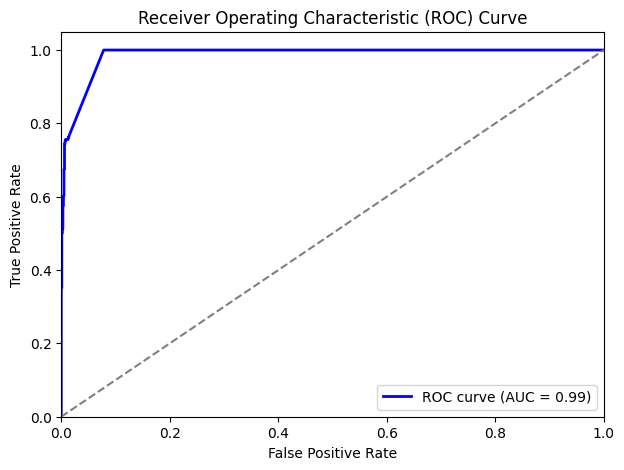

In [152]:
from sklearn.metrics import roc_curve, auc

model_1.eval()
with torch.inference_mode():
  test_logits = torch.sigmoid(model_1(X_test_torch).squeeze())
  y_pred = torch.round(test_logits).detach().numpy()
  
  loss = loss_fn(test_logits, y_test_torch)
  f1 = f1_score(y_test, y_pred)
  
  print(f'Test Loss: {test_loss.item():.4f}')
  print(f'Test F1: {f1 * 100:.2f}%')
  
  print(classification_report(
    y_test, 
    y_pred, 
    target_names=["Oranges", "Graipfruits"]
  ))
  
  # Compute ROC curve and AUC
  y_probabilities = test_logits.numpy() # Get predicted probabilities
  fpr, tpr, _ = roc_curve(y_test, y_probabilities)
  roc_auc = auc(fpr, tpr)
  # Plot ROC curve
  plt.figure(figsize=(7, 5))
  plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc='lower right')
  plt.show()



In [137]:
def plot_roc_curve(test_logits, y_test) -> None:
  # Compute ROC curve and AUC
  y_probabilities = test_logits.numpy() # Get predicted probabilities
  fpr, tpr, _ = roc_curve(y_test, y_probabilities)
  roc_auc = auc(fpr, tpr)
  # Plot ROC curve
  plt.figure(figsize=(7, 5))
  plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc='lower right')
  plt.show()

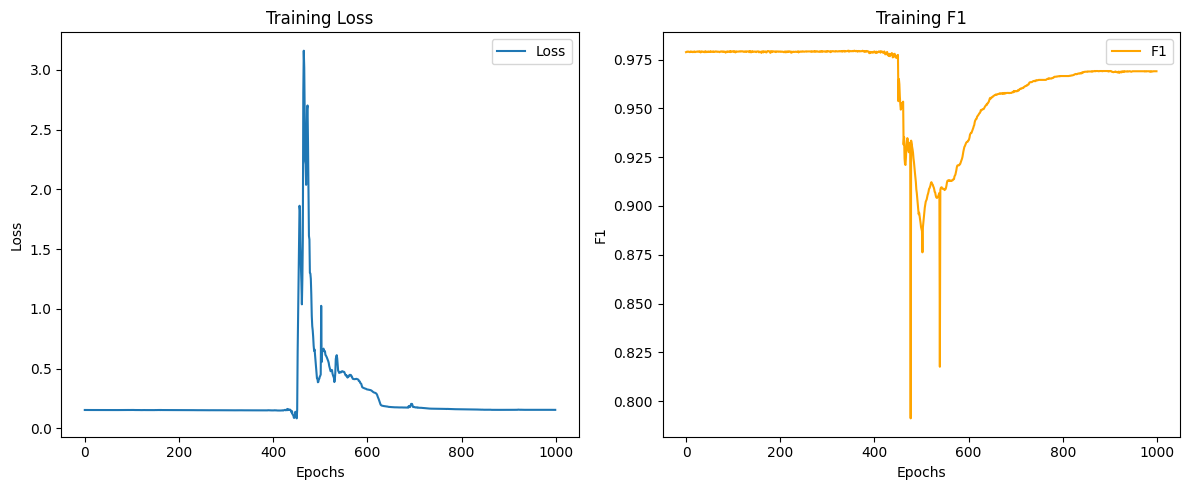

In [153]:
# Plot loss and accuracy curves
plt.figure(figsize=(12, 5))
# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(range(epochs), losses, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(range(epochs), f1_scores, label='F1', color='orange')
plt.xlabel('Epochs')
plt.ylabel('F1')
plt.title('Training F1')
plt.legend()
plt.tight_layout()
plt.show()

In [133]:
def plot_loss_f1(epochs, losses, f1_scores) -> None:
  # Plot loss and accuracy curves
  plt.figure(figsize=(12, 5))
  # Plot training loss
  plt.subplot(1, 2, 1)
  plt.plot(range(epochs), losses, label='Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Training Loss')
  plt.legend()
  # Plot training accuracy
  plt.subplot(1, 2, 2)
  plt.plot(range(epochs), f1_scores, label='F1', color='orange')
  plt.xlabel('Epochs')
  plt.ylabel('F1')
  plt.title('Training F1')
  plt.legend()
  plt.tight_layout()
  plt.show()

поняв-приняв, поставимо кількість епох на 750

In [143]:
def train(model, loss_fn, optimizer, epochs, score) -> tuple[list, list]:
  losses = []
  f1_scores = []
  
  model.train()
  for epoch in range(epochs):
    pred_logits = model(X_train_torch).squeeze()
    y_pred = torch.sigmoid(pred_logits)
    
    # LOSS EXPECTS RAW LOGITS
    loss = loss_fn(y_pred, y_train_torch)
    losses.append(loss.item())
    
    y_pred_numpy = torch.round(y_pred).detach().numpy()
    f1 = score(y_train, y_pred_numpy)
    f1_scores.append(f1)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # Print loss and accuracy every 100 epochs for monitoring
    if (epoch + 1) % 100 == 0:
      print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}, F1: {f1 * 100:.2f}%')
  return losses, f1_scores

In [144]:
def test(model, loss_fn, score) -> None:
  model.eval()
  with torch.inference_mode():
    test_logits = torch.sigmoid(model(X_test_torch).squeeze())
    y_pred = torch.round(test_logits).detach().numpy()
    
    loss = loss_fn(test_logits, y_test_torch)
    f1 = score(y_test, y_pred)
    
    print(f'Test Loss: {loss.item():.4f}')
    print(f'Test F1: {f1 * 100:.2f}%')
    
    print(classification_report(
      y_test, 
      y_pred, 
      target_names=["Oranges", "Graipfruits"]
    ))
    plot_roc_curve(test_logits, y_test_torch)

запихнем красіво в функцію

In [154]:
epochs_1 = 750

losses, f1_scores = train(
  model=model_1,
  loss_fn=loss_fn,
  optimizer=optimizer,
  epochs=epochs_1,
  score=f1_score,
)

Epoch [100/750], Loss: 0.1538, F1: 96.99%
Epoch [200/750], Loss: 0.1359, F1: 97.17%
Epoch [300/750], Loss: 0.1318, F1: 97.14%
Epoch [400/750], Loss: 0.1044, F1: 97.36%
Epoch [500/750], Loss: 0.1005, F1: 97.41%
Epoch [600/750], Loss: 0.0751, F1: 97.46%
Epoch [700/750], Loss: 0.0767, F1: 97.41%


Test Loss: 0.1357
Test F1: 96.76%
              precision    recall  f1-score   support

     Oranges       1.00      0.94      0.97      1012
 Graipfruits       0.94      1.00      0.97       988

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



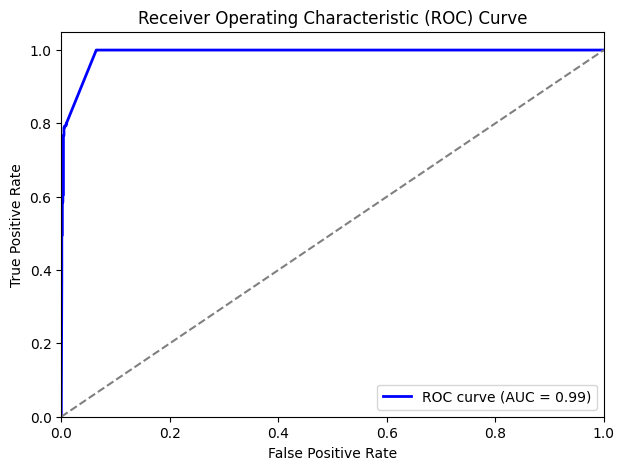

In [155]:
test(model_1, loss_fn, f1_score)

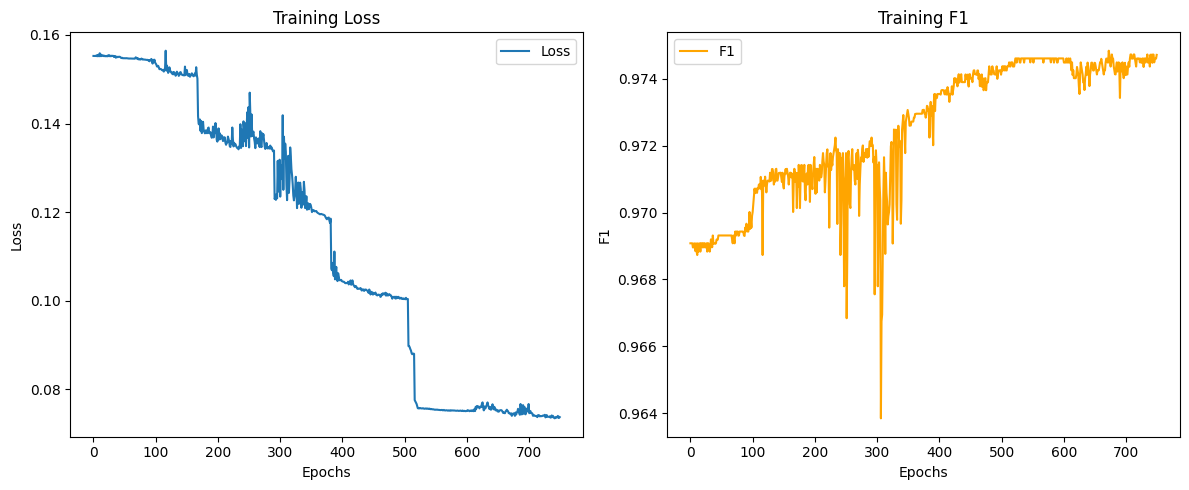

In [156]:
plot_loss_f1(epochs_1, losses, f1_scores)

я би ше модельок поробив, але поки розберемось з власноручним перцептроном

In [209]:
class XORNeuralNetwork:
  def __init__(self, input_size=2, hidden_size=4, output_size=1, learning_rate=0.1):
    """Initializes network parameters including weights and biases."""
    np.random.seed(42) # Ensure reproducibility
    self.learning_rate = learning_rate
    
    # Initialize weights with random values and biases with zeros
    self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(1 / input_size)
    self.W2 = np.random.randn(hidden_size, output_size) * np.sqrt(1 / hidden_size)
    self.b1 = np.zeros((1, hidden_size)) # Hidden layer biases
    self.b2 = np.zeros((1, output_size)) # Output layer bias
    
  def sigmoid(self, x):
    x = np.clip(x, -500, 500)  # Clip to avoid extreme values
    return 1 / (1 + np.exp(-x))
  
  def sigmoid_derivative(self, z):
    return z * (1 - z)  # Ensure this keeps the correct shape
  def relu(self, x):
    """Applies the ReLU activation function to input x."""
    return np.maximum(0, x)
  def relu_derivative(self, x):
    """Computes the derivative of the ReLU function."""
    return (x > 0).astype(float)
  
  def forward(self, X):
    """Performs the forward pass through the network."""
    self.z1 = np.dot(X, self.W1) + self.b1 
    self.a1 = self.relu(self.z1) # Apply ReLU activation
    self.z2 = np.dot(self.a1, self.W2) + self.b2 
    self.a2 = self.sigmoid(self.z2) # Apply sigmoid activation
    return self.a2
  
  def backward(self, X, y):
    """Performs backpropagation to update weights and biases."""
    y = y.reshape(-1, 1)  # Ensure y is a column vector
    
    d_a2 = (self.a2 - y) / y.shape[0]  # Compute output error
    
    d_z2 = d_a2 * self.sigmoid_derivative(self.z2)  # Use self.z2, not self.a2
    d_z2 = d_z2.reshape(-1, 1)  # Ensure correct shape

    d_W2 = np.dot(self.a1.T, d_z2) 
    d_b2 = np.sum(d_z2, axis=0, keepdims=True)  # Gradient for b2 

    d_a1 = np.dot(d_z2, self.W2.T) 
    d_z1 = d_a1 * self.relu_derivative(self.z1)  # Compute gradient 

    d_W1 = np.dot(X.T, d_z1)  # Gradient for W1 
    d_b1 = np.sum(d_z1, axis=0, keepdims=True)  # Gradient for b1 

    # Update weights and biases using gradient descent
    self.W1 -= self.learning_rate * d_W1
    self.b1 -= self.learning_rate * d_b1
    self.W2 -= self.learning_rate * d_W2
    self.b2 -= self.learning_rate * d_b2

    
  def train(self, X, y, epochs=100):
    """Trains the network using gradient descent for a specified 
    number of epochs."""
    for epoch in range(epochs):
      self.forward(X) # Compute forward pass
      self.backward(X, y) # Perform backpropagation
    
      if epoch % 10 == 0: # Print loss every 1000 epochs
        loss = -np.mean(y * np.log(self.a2 + 1e-8) + (1 - y) * np.log(1 - self.a2 + 1e-8))
        print(f'Epoch {epoch}, Loss: {loss:.5f}')
        
  def predict(self, X):
    """Predicts the output for given inputs using the trained 
    model."""
    predictions = self.forward(X) # Compute forward pass
    return (predictions > 0.5).astype(int)

In [210]:
# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]) # Input features
y = np.array([[0], [1], [1], [0]]) # Expected outputs
# Train the network
nn = XORNeuralNetwork()
nn.train(X, y)


Epoch 0, Loss: 0.72741
Epoch 10, Loss: 0.73005
Epoch 20, Loss: 0.74654
Epoch 30, Loss: 0.88172
Epoch 40, Loss: nan
Epoch 50, Loss: nan
Epoch 60, Loss: nan
Epoch 70, Loss: nan
Epoch 80, Loss: nan
Epoch 90, Loss: nan


In [211]:
# Make predictions
predictions = nn.predict(X)
print("Predictions:", predictions.flatten())

Predictions: [0 0 0 0]


а якшо на реальних даних?

In [212]:
X_train_scaled.shape[1]

5

In [214]:
# Train the network
nn = XORNeuralNetwork(
  input_size=X_train_scaled.shape[1],
  hidden_size=12,
  output_size=1,
  learning_rate=0.01,
)
nn.train(X_train_scaled, y_train.to_numpy())

Epoch 0, Loss: 0.72503
Epoch 10, Loss: 0.72506
Epoch 20, Loss: 0.72524
Epoch 30, Loss: 0.72567
Epoch 40, Loss: 0.72649
Epoch 50, Loss: 0.72799
Epoch 60, Loss: 0.73072
Epoch 70, Loss: 0.73589
Epoch 80, Loss: 0.74667
Epoch 90, Loss: 0.77411


страшно... були проблеми з множенням матриць, вони чогось там різних розмірів були, я їх пробував розв'язати через чат, але варто-не-варто було, стало тільки гірше